In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/IIP/Capstone Project_Hotel Reservation/Hotel Reservations.csv')

# Display the first few rows of the dataset
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The dataset has 36,275 observations and 19 columns.

THE DATE COLUMN

In [4]:
# Convert arrival_year, arrival_month, and arrival_date to a datetime object
df['arrival_date'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].rename(columns={'arrival_year': 'year', 'arrival_month': 'month', 'arrival_date': 'day'}), errors='coerce')

# Remove the original year, month, and day columns
df = df.drop(['arrival_year', 'arrival_month'], axis=1)

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018-04-11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_date                          36238 non-null  datetime64[ns]
 10

After merging the date columns, we now have 17 columns.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

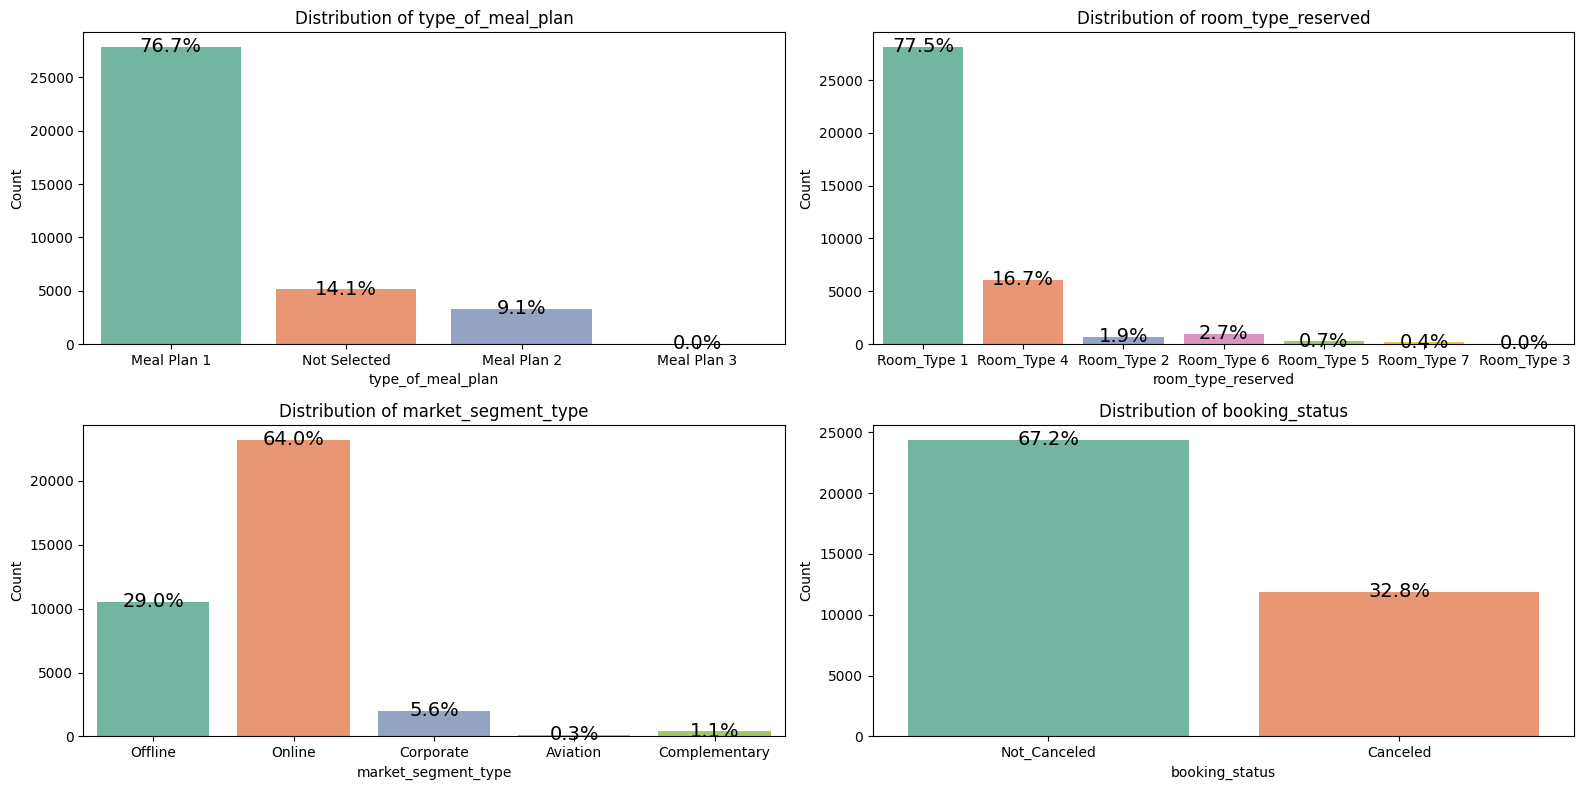

In [7]:
# Function to create count and percentage bar plots
def plot_categorical_distribution(column, ax):
    # Count plot
    sns.countplot(x=column, data=df, palette='Set2', ax=ax)

    # Calculate and display counts and percentages on bars
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        # # Display count
        # ax.annotate(f'{p.get_height()}',
        #             (p.get_x() + p.get_width() / 2., height + 5),
        #             ha='center', va='center', fontsize=11, color='black')
        # Display percentage
        ax.annotate(f'{100 * height / total:.1f}%',
                    (p.get_x() + p.get_width() / 2., height + 20),
                    ha='center', va='center', fontsize=14, color='black')

    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Plotting in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

plot_categorical_distribution('type_of_meal_plan', axes[0, 0])
plot_categorical_distribution('room_type_reserved', axes[0, 1])
plot_categorical_distribution('market_segment_type', axes[1, 0])
plot_categorical_distribution('booking_status', axes[1, 1])

plt.tight_layout()
plt.show()

The visualization above shows a summary that:

76.7% of customers prefer Meal type 1 while no one prefers meal type 3.

77.5% prefer Room Type 1 followed by 16.7% for room type 4 and no one wants room type and no one wants room type 3.

Most of the market segment is online (64%) followed by offline (29%).

Most bookings, 67.2%, are not cancelled.

In [8]:
for col in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    print(df[col].value_counts())


type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


This gives the total number of different categories in each categorical variable.

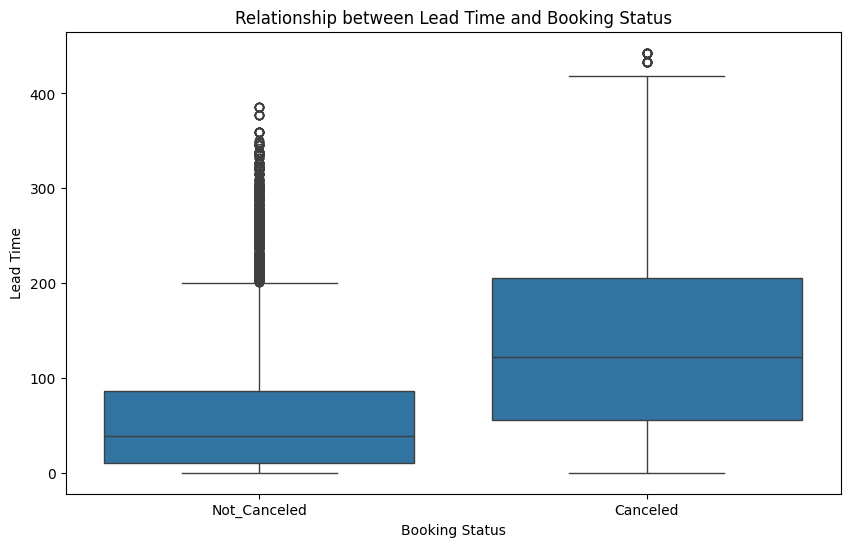

In [9]:
#  the relationship between lead time and booking status a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Relationship between Lead Time and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()


Lead time is the number of days between the booking and the arrival date. People with fewer days in between are more likely to cancel. However, there are many outliers of people with more days but still cancelling.

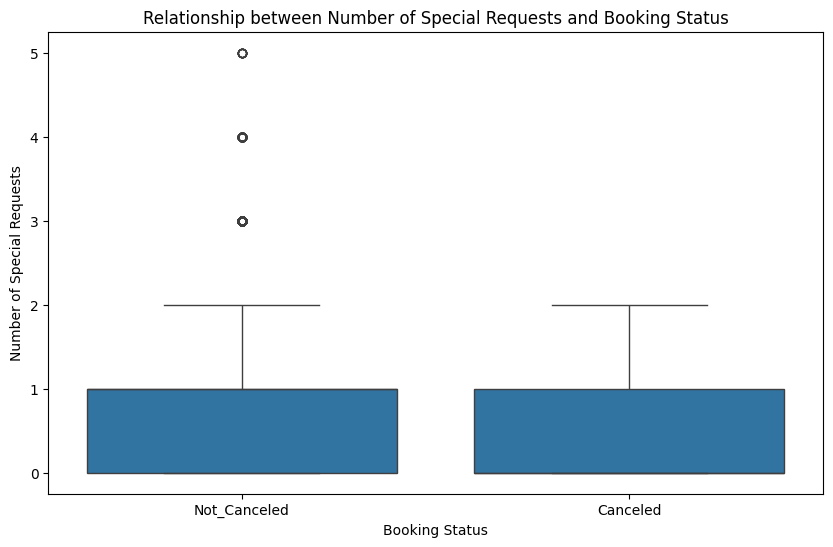

In [10]:
# prompt: the relationship between number of special request and booking status.

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df)
plt.title('Relationship between Number of Special Requests and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.show()


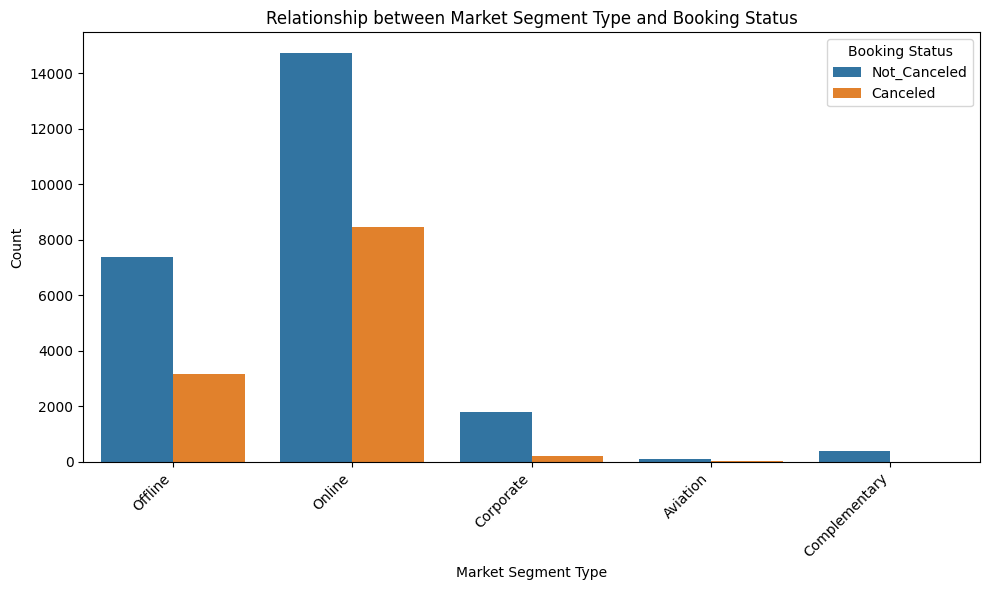

In [11]:
# prompt: relationship between market segment type and booking status with the bars next to each other and not on top of each other

plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df, dodge=True)
plt.title('Relationship between Market Segment Type and Booking Status')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()


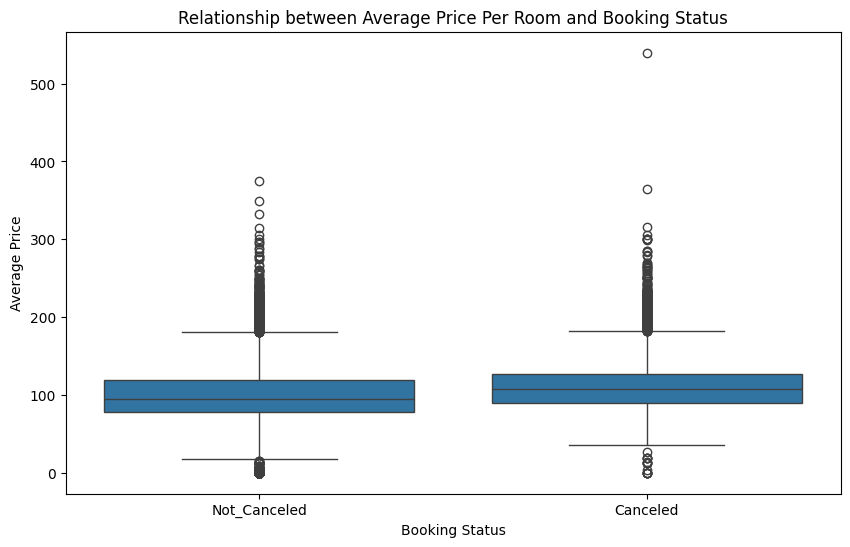

In [12]:
# prompt: relationship between average price and and booking status

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Relationship between Average Price Per Room and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.show()


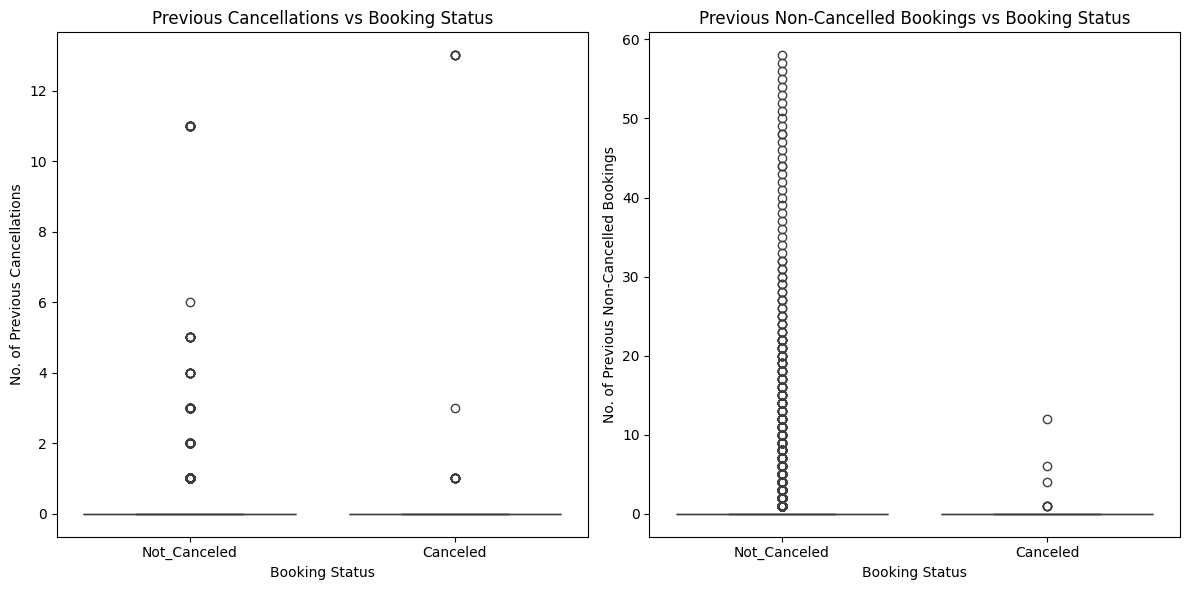

In [13]:
# prompt: Relationship between no_of_previous_cancellations, no_of_previous_bookings_not_canceled and booking status

plt.figure(figsize=(12, 6))

# Subplot 1: no_of_previous_cancellations vs booking_status
plt.subplot(1, 2, 1)
sns.boxplot(x='booking_status', y='no_of_previous_cancellations', data=df)
plt.title('Previous Cancellations vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('No. of Previous Cancellations')

# Subplot 2: no_of_previous_bookings_not_canceled vs booking_status
plt.subplot(1, 2, 2)
sns.boxplot(x='booking_status', y='no_of_previous_bookings_not_canceled', data=df)
plt.title('Previous Non-Cancelled Bookings vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('No. of Previous Non-Cancelled Bookings')

plt.tight_layout()
plt.show()


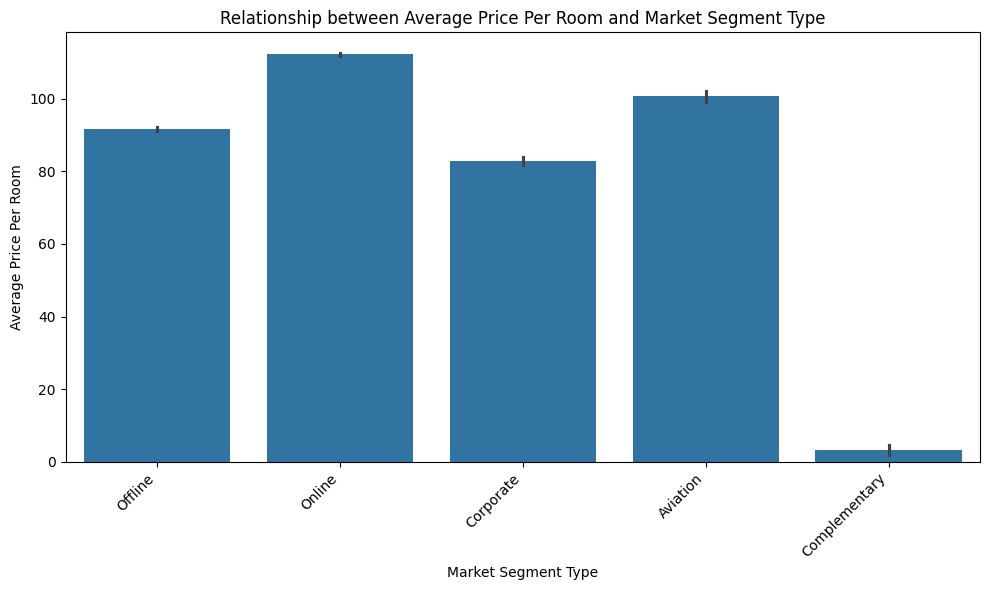

In [14]:
# prompt: relationship between avg_price_per_room and market_segment_type using bar graphs.

plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment_type', y='avg_price_per_room', data=df)
plt.title('Relationship between Average Price Per Room and Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price Per Room')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


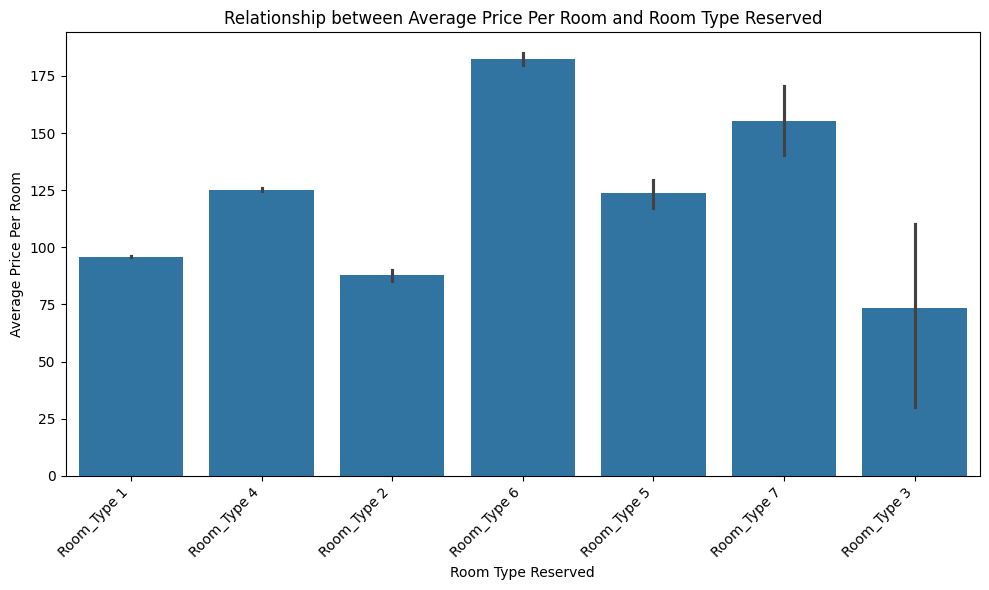

In [15]:
# prompt: relationship between  room_type_reserved and avg_price_per_room

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=df)
plt.title('Relationship between Average Price Per Room and Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Average Price Per Room')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


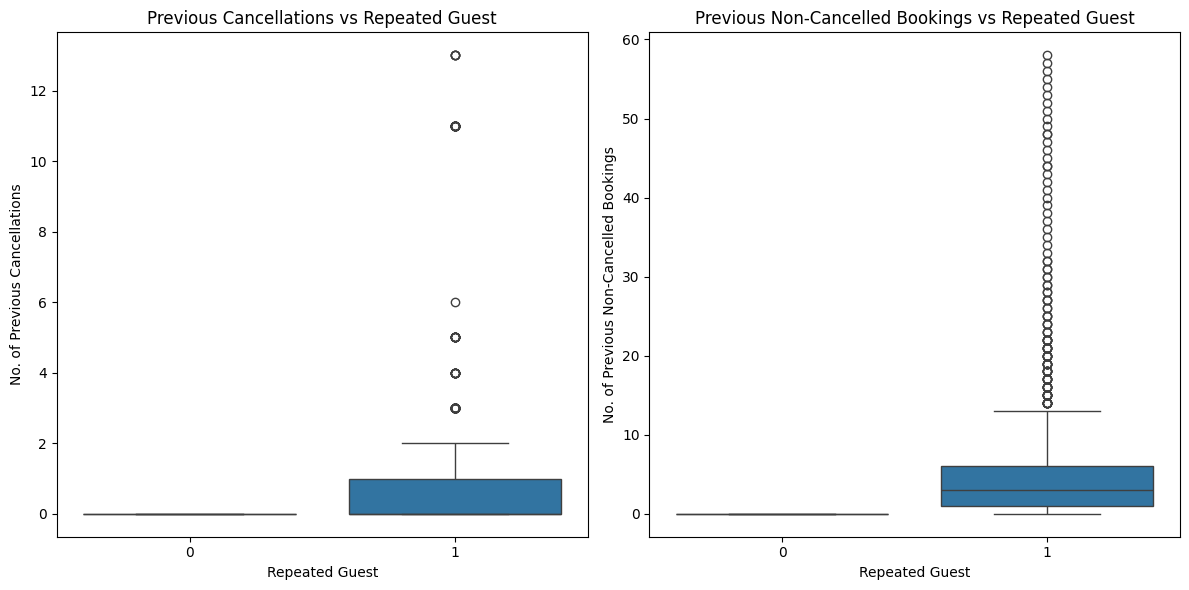

In [16]:
# prompt: relationship between no_of_previous_cancellations, no_of_previous_bookings_not_canceled and repeated guests

plt.figure(figsize=(12, 6))

# Subplot 1: no_of_previous_cancellations vs repeated_guest
plt.subplot(1, 2, 1)
sns.boxplot(x='repeated_guest', y='no_of_previous_cancellations', data=df)
plt.title('Previous Cancellations vs Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('No. of Previous Cancellations')

# Subplot 2: no_of_previous_bookings_not_canceled vs repeated_guest
plt.subplot(1, 2, 2)
sns.boxplot(x='repeated_guest', y='no_of_previous_bookings_not_canceled', data=df)
plt.title('Previous Non-Cancelled Bookings vs Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('No. of Previous Non-Cancelled Bookings')

plt.tight_layout()
plt.show()


ENCODING

We have 4 categorical variables which we need to encode to numerical values. These are type of meal plan, room type reserved, market segment type and booking status.

In [17]:
# # convert all the categorical variables to numerical through encoding.

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# # Iterate over all columns
# for col in df.columns:
#     # Check if the column is of object type (categorical)
#     if df[col].dtype == 'object' or df[col].dtype.name == 'category':
#         # Apply label encoding to the column
#         df[col] = le.fit_transform(df[col])
# # Display first few rows to verify
# df.head(10)


We choose to use mapping to control the encoded variables.

In [18]:
# Define mappings for each categorical variable
meal_plan_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}

room_type_mapping = {
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5,
    'Room_Type 7': 6
}

market_segment_mapping = {
    'Online': 0,
    'Offline': 1,
    'Corporate': 2,
    'Complementary': 3,
    'Aviation': 4
}

booking_status_mapping = {
    'Not_Canceled': 0,
    'Canceled': 1
}


In [19]:
# Apply mappings
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(meal_plan_mapping)
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_mapping)
df['market_segment_type'] = df['market_segment_type'].map(market_segment_mapping)
df['booking_status'] = df['booking_status'].map(booking_status_mapping)

# Display the first few rows to verify the mappings
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,0,224,2017-10-02,1,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,0,5,2018-11-06,0,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,0,1,2018-02-28,0,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,0,211,2018-05-20,0,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,0,48,2018-04-11,0,0,0,0,94.50,0,1


In [20]:
# Handle missing or unmapped values (if any)
df.dropna(inplace=True)  # Drop rows with NaN values


In [21]:
df.shape

(36238, 17)

The dataset now has 36,238 observations and 17 attributes.

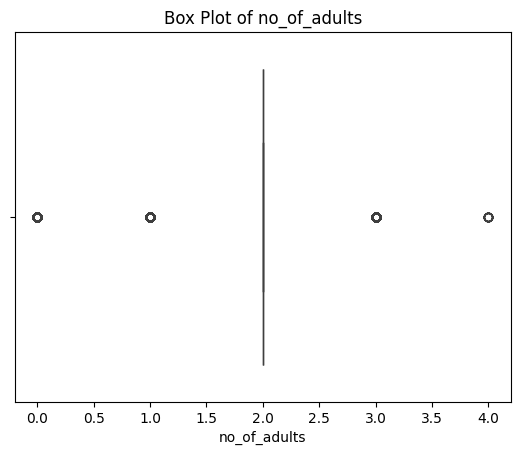

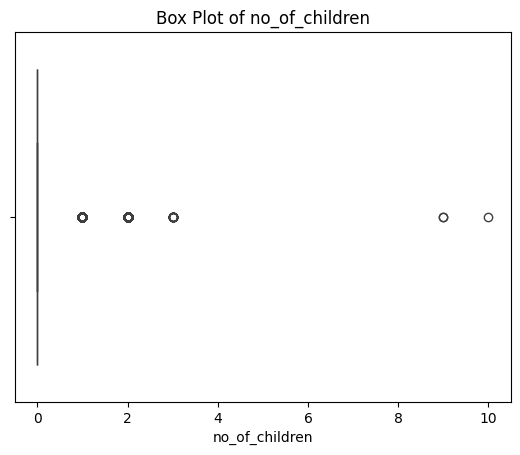

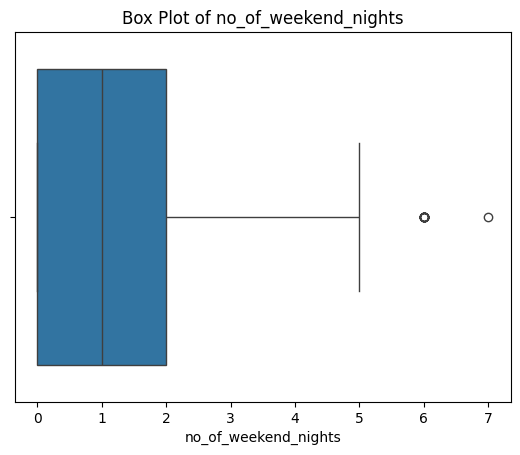

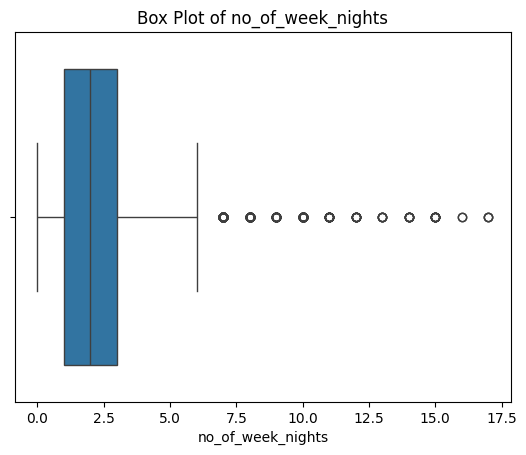

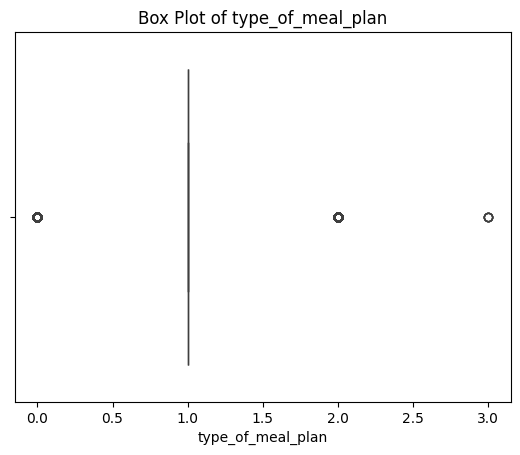

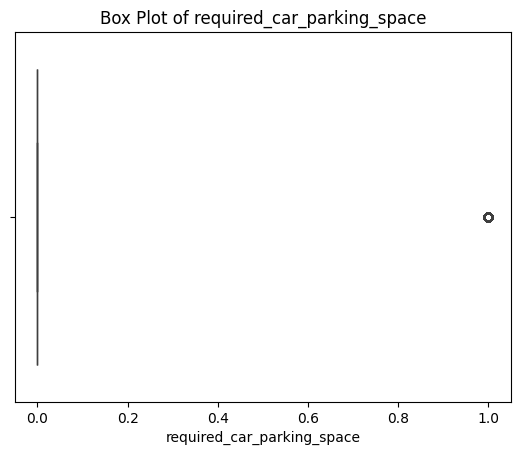

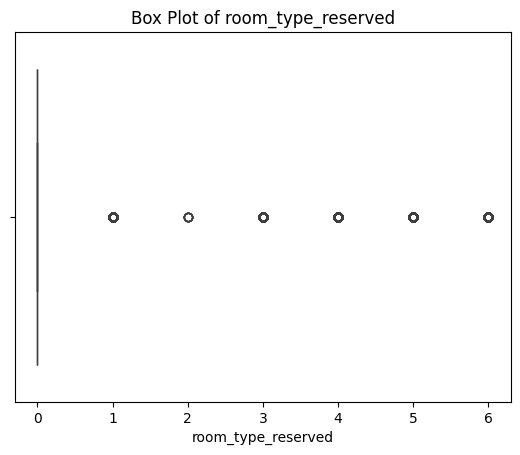

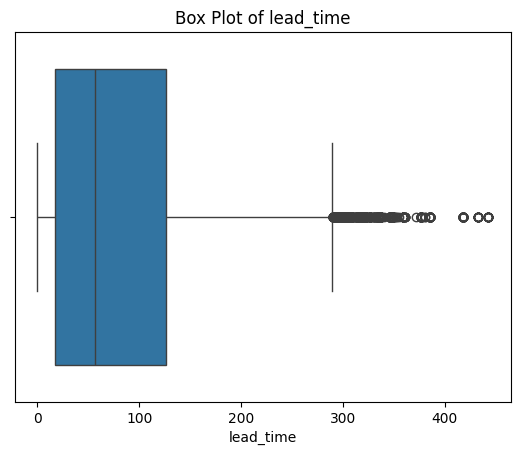

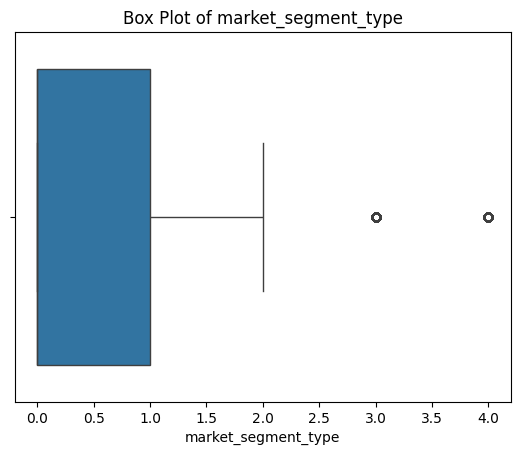

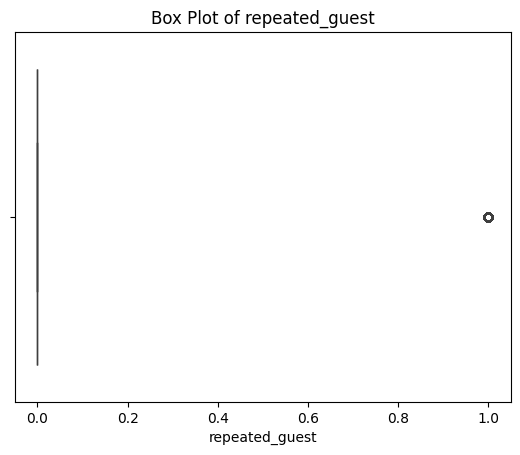

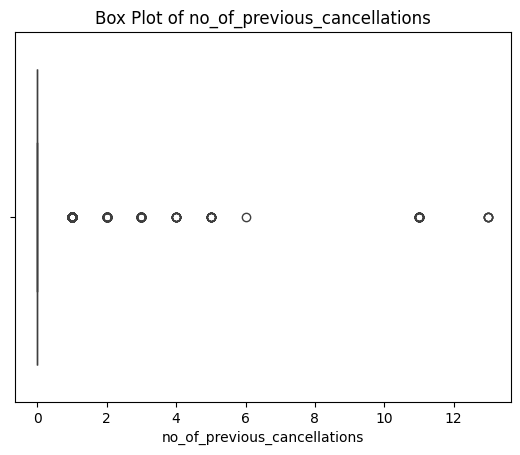

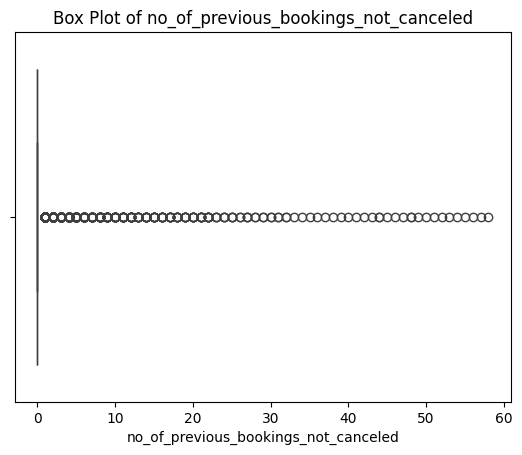

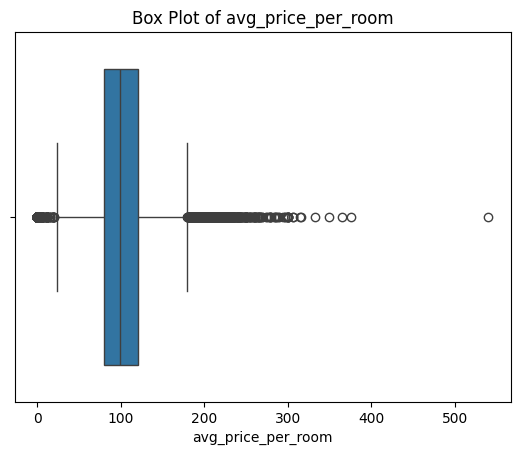

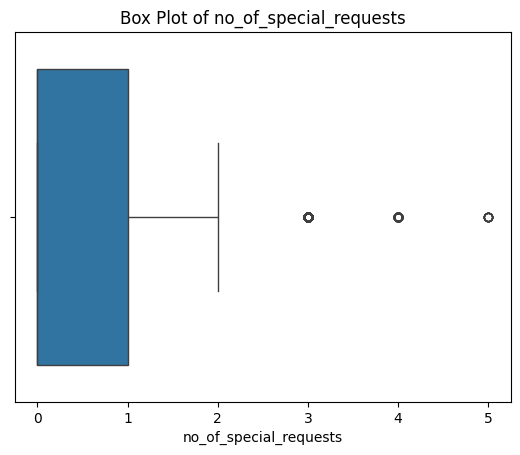

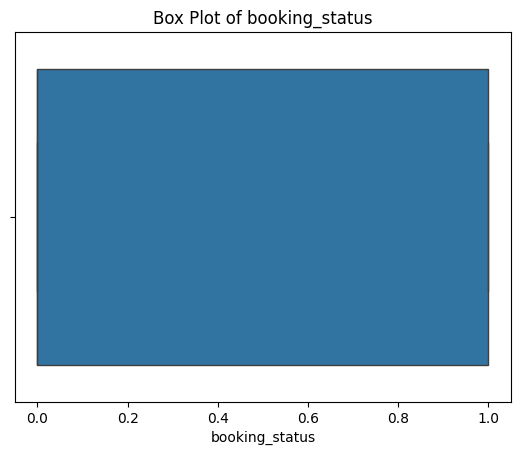

In [22]:
# prompt: Using dataframe df: check for outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over numerical columns and create box plots
for column in df.select_dtypes(include=['number']):
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


SUMMARY STATISTICS

In [23]:
# Summary statistics for numerical columns
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.949859,0.030934,0.708455,85.275070,2018-05-24 16:37:29.130746880,0.447320,0.025553,0.023346,0.152961,103.437259,0.619957,0.327777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,17.000000,2018-02-28 00:00:00,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,57.000000,2018-06-12 00:00:00,0.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,126.000000,2018-09-19 00:00:00,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018-12-31 00:00:00,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000
std,0.518572,0.402540,0.870992,1.410784,0.480313,0.173142,1.399451,85.953561,NaN,0.681317,0.157801,0.368483,1.753366,35.084264,0.786403,0.469410


The mean number of adults in a booking is 1.8 people with the minimum being 0 and the maximum 4.

The average number of children is 0 and the maximum is 10. The average is 0.16.

The average price per room minimum is 0 and the maximum is 540. The mean is 103.


CORRELATION

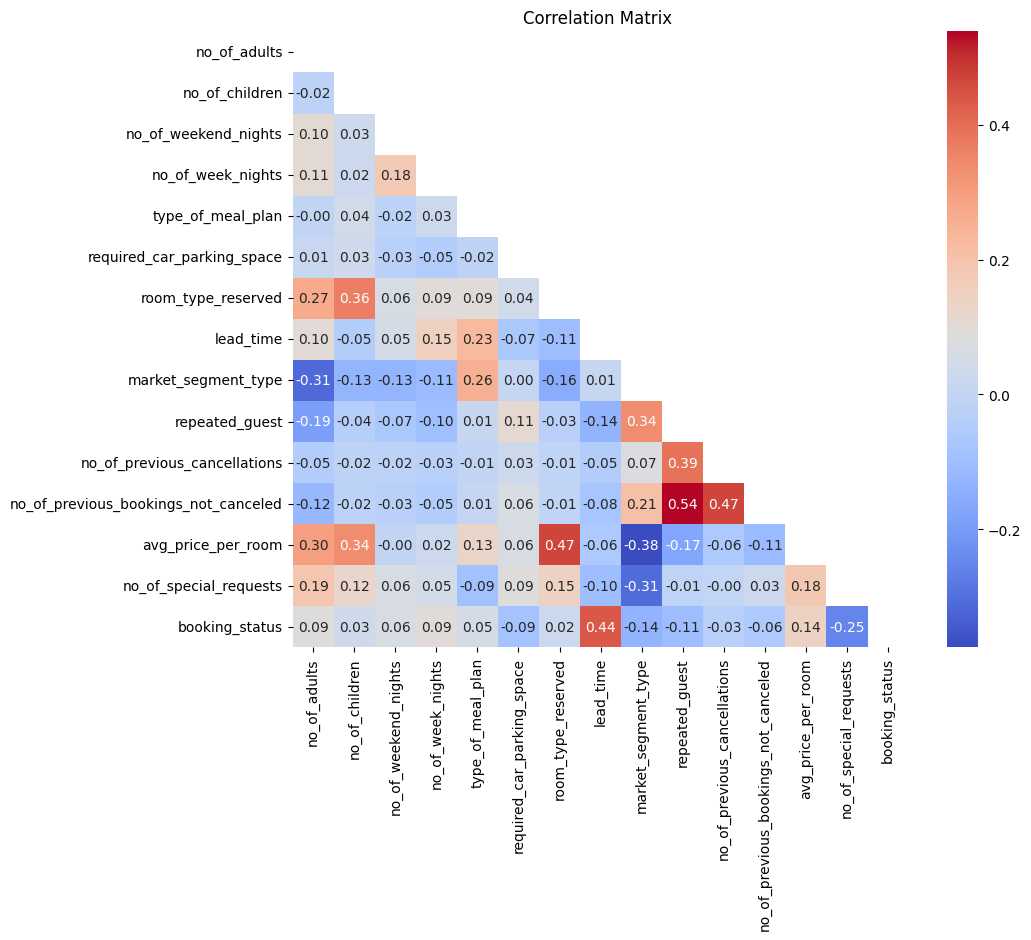

In [24]:
import numpy as np
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix ')
plt.show()

The booking status has a mild positive relationship with lead time.

Repeated guests have a positive correlation (0.54) with number of previous bookings not cancelled. The relationship between repeated guests and previous bookings canceled is also positive but not strong(0.39).

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

vif_data


,Feature,VIF
0,no_of_adults,11.796135
1,no_of_children,1.339582
2,no_of_weekend_nights,1.941669
3,no_of_week_nights,3.500023
4,type_of_meal_plan,5.965584
5,required_car_parking_space,1.065594
6,room_type_reserved,1.670171
7,lead_time,2.835852
8,market_segment_type,2.006334
9,repeated_guest,1.680090


High VIF (VIF > 10):

  no_of_adults (VIF = 11.80): This feature exhibits a high degree of multicollinearity with other features in the dataset. It suggests that the number of adults is highly correlated with other variables. From the correlation heatmap, this can be the average price per room and the market segment type.

  avg_price_per_room (VIF = 12.21): The average price per room also shows high multicollinearity, indicating strong correlation with other features. From the correlation heatmap this are number of adults, number of children, the room type and the market segment.

Moderate VIF (5 < VIF ≤ 10):

  type_of_meal_plan (VIF = 5.97): This feature has moderate multicollinearity, which may warrant closer examination, but it's generally acceptable.

Low to Moderate VIF (VIF ≤ 5):

  Most other features, such as no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, and market_segment_type, have VIFs ranging from 1.07 to 3.50. These values indicate low to moderate multicollinearity, which is generally considered acceptable.

LOGISTIC REGRESSION

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
# Define the dependent and independent variables
X = numerical_df.drop(columns=['booking_status'])  # Features
y = numerical_df['booking_status']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4901
           1       0.72      0.58      0.64      2347

    accuracy                           0.79      7248
   macro avg       0.77      0.73      0.75      7248
weighted avg       0.78      0.79      0.78      7248



### Summary of Logistic Regression Results:

- **Accuracy: 0.79**  
  The model correctly predicted the `booking_status` 79% of the time.

- **Classification Report:**
  - **Class 0 (`not cancelled`):**
    - **Precision:** 0.81 (81% of instances predicted as `not cancelled` were correct).
    - **Recall:** 0.89 (89% of actual `not cancelled` instances were correctly identified).
    - **F1-Score:** 0.85 (harmonic mean of precision and recall).
  - **Class 1 (`booked`):**
    - **Precision:** 0.72 (72% of instances predicted as `cancelled` were correct).
    - **Recall:** 0.58 (58% of actual `cancelled` instances were correctly identified).
    - **F1-Score:** 0.64 (harmonic mean of precision and recall).
  - **Overall:**
    - The model performs better at predicting class 0 (`not cancelled`) than class 1 (`cancelled`).
    - The **macro average** F1-score (0.75) indicates a balanced average across both classes.
    - The **weighted average** F1-score (0.78) accounts for class imbalance and reflects overall model performance.

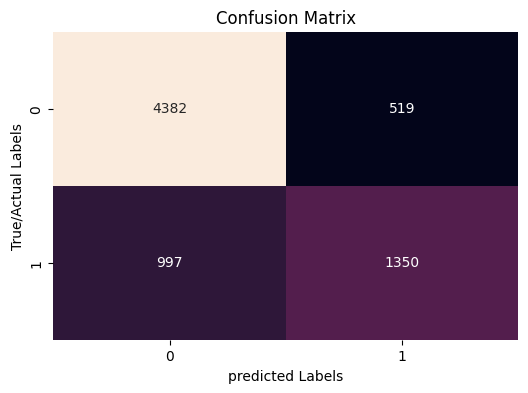

In [28]:
# plot for confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel("predicted Labels")
plt.ylabel("True/Actual Labels")
plt.title("Confusion Matrix")
plt.show()

- **Confusion Matrix:**
  - **True Negatives (4382):** The model correctly predicted 4382 instances of class 0 (`not cancelled`).
  - **False Positives (519):** The model incorrectly predicted 519 instances as class 1 when they were actually class 0.
  - **False Negatives (997):** The model incorrectly predicted 997 instances as class 0 when they were actually class 1.
  - **True Positives (1350):** The model correctly predicted 1350 instances of class 1 (`cancelled`).

IMPROVING THE MODEL

Hyperparameter Tuning and Regularization


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to use
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")


Best parameters: {'C': 100, 'solver': 'liblinear'}


In [30]:
# Initialize the logistic regression model with the best parameters
final_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=1000)

# Fit the model on the training data
final_model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, solver='liblinear')

In [31]:
# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.79
Confusion Matrix:
[[4381  520]
 [ 997 1350]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4901
           1       0.72      0.58      0.64      2347

    accuracy                           0.79      7248
   macro avg       0.77      0.73      0.75      7248
weighted avg       0.78      0.79      0.78      7248



The model shows no improvement.

Resampling

In [32]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train the logistic regression model with resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.78
Confusion Matrix:
[[5813 1565]
 [ 862 2632]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7378
           1       0.63      0.75      0.68      3494

    accuracy                           0.78     10872
   macro avg       0.75      0.77      0.76     10872
weighted avg       0.79      0.78      0.78     10872



Oversampling the minority class does not work.

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train the logistic regression model with resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.78
Confusion Matrix:
[[5801 1577]
 [ 853 2641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7378
           1       0.63      0.76      0.68      3494

    accuracy                           0.78     10872
   macro avg       0.75      0.77      0.76     10872
weighted avg       0.79      0.78      0.78     10872



Undersampling the majority class does not improve.

FEATURE IMPORTANCE

Since the efforts to improve the model have not been successful, we perform feature importance.

In [34]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
log_reg.fit(X_scaled, y)

# Get the coefficients and feature names
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

feature_importance


,Feature,Coefficient,Absolute Coefficient
7,lead_time,1.232072,1.232072
13,no_of_special_requests,-1.085671,1.085671
8,market_segment_type,-0.815402,0.815402
12,avg_price_per_room,0.680040,0.680040
9,repeated_guest,-0.298316,0.298316
5,required_car_parking_space,-0.252606,0.252606
4,type_of_meal_plan,-0.137482,0.137482
2,no_of_weekend_nights,0.129032,0.129032
6,room_type_reserved,-0.116209,0.116209
10,no_of_previous_cancellations,0.068587,0.068587


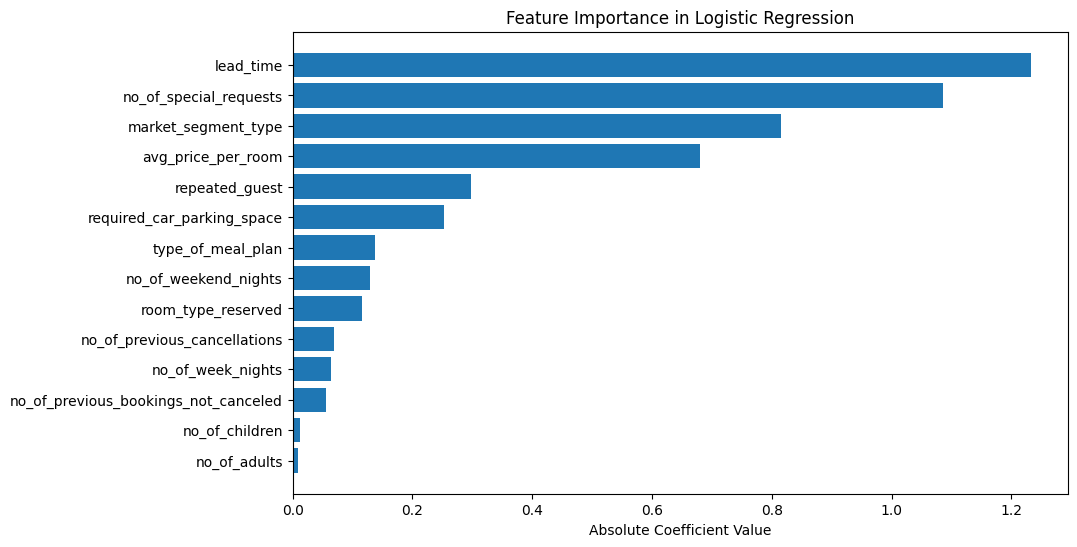

In [35]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


From the results above, lead time, number of special requests, and market segment type are very important in determining whether there will be a cancellation or not.

The number of adults\or children, previous cancellation and number of week nights are the least important.

**RANDOM FOREST**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.88
Confusion Matrix:
[[6880  498]
 [ 754 2740]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      7378
           1       0.85      0.78      0.81      3494

    accuracy                           0.88     10872
   macro avg       0.87      0.86      0.87     10872
weighted avg       0.88      0.88      0.88     10872



Random Forest performs better than logistic regression.

- **Accuracy:** 0.88 (88%)
  - The model correctly predicted the outcome 88% of the time.

- **Confusion Matrix:**
  - **True Negatives (TN):** 6880 (correctly predicted class 0 (Not cancelled))
  - **False Positives (FP):** 498 (incorrectly predicted class 1 as class 0)
  - **False Negatives (FN):** 754 (incorrectly predicted class 0 as class 1)
  - **True Positives (TP):** 2740 (correctly predicted class 1 (Cancelled))

- **Classification Report:**
  - **Class 0 (Not cancelled):**
    - **Precision:** 0.90 (90% of instances predicted as `Not cancelled` were correct)
    - **Recall:** 0.93 (93% of actual `Not cancelled` instances were correctly identified)
    - **F1-Score:** 0.92 (harmonic mean of precision and recall)

  - **Class 1 (booked):**
    - **Precision:** 0.85 (85% of instances predicted as `Cancelled` were correct)
    - **Recall:** 0.78 (78% of actual `Cancelled` instances were correctly identified)
    - **F1-Score:** 0.81 (harmonic mean of precision and recall)

  - **Overall:**
    - **Macro Average F1-Score:** 0.87 (average performance across both classes)
    - **Weighted Average F1-Score:** 0.88 (accounts for class imbalance)

### Interpretation
- The model performs well overall, with high accuracy and balanced precision and recall for both classes.
- It is particularly strong at predicting class 0 (`not cancelled`) with high precision and recall.
- There is a slight drop in performance for class 1 (`cancelled`), especially in recall, indicating that the model could be improved in identifying instances of class 1.

In [38]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance value
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                 Feature  Importance
7                              lead_time    0.409420
12                    avg_price_per_room    0.237812
13                no_of_special_requests    0.103370
3                      no_of_week_nights    0.065062
8                    market_segment_type    0.053347
2                   no_of_weekend_nights    0.042755
0                           no_of_adults    0.026583
4                      type_of_meal_plan    0.022692
6                     room_type_reserved    0.018502
1                         no_of_children    0.008248
5             required_car_parking_space    0.007388
9                         repeated_guest    0.002801
11  no_of_previous_bookings_not_canceled    0.001600
10          no_of_previous_cancellations    0.000421


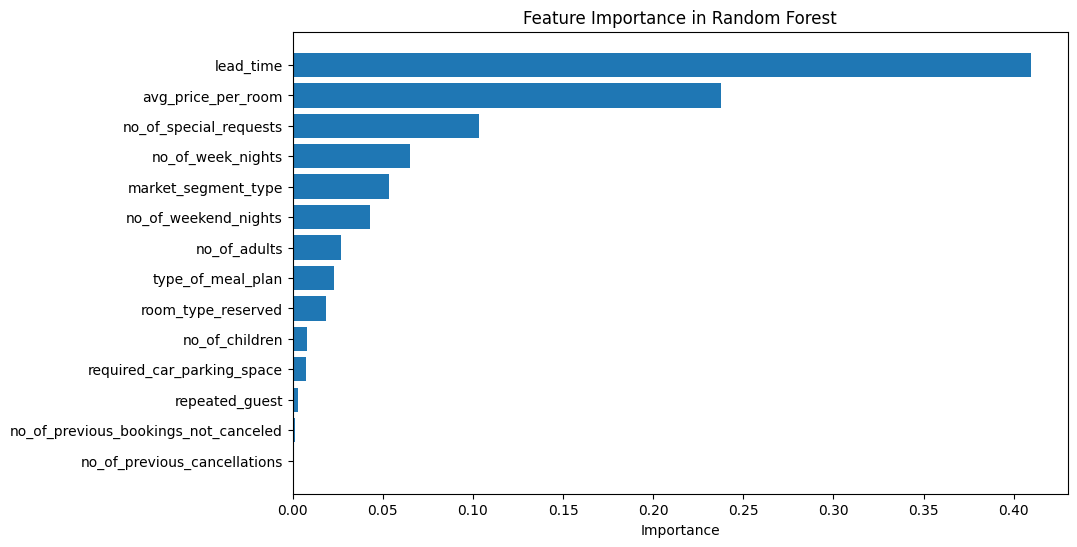

In [39]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


Like Logistic Regression, Random forest shows lead time as the most important feature, but this is followed by average price per room and number of special request unlike Logistic.

RF then shows previous cancellations and repeated guests are the least important like loogistic regression.

The order of importance changes between the two models but they concur on which models are important.

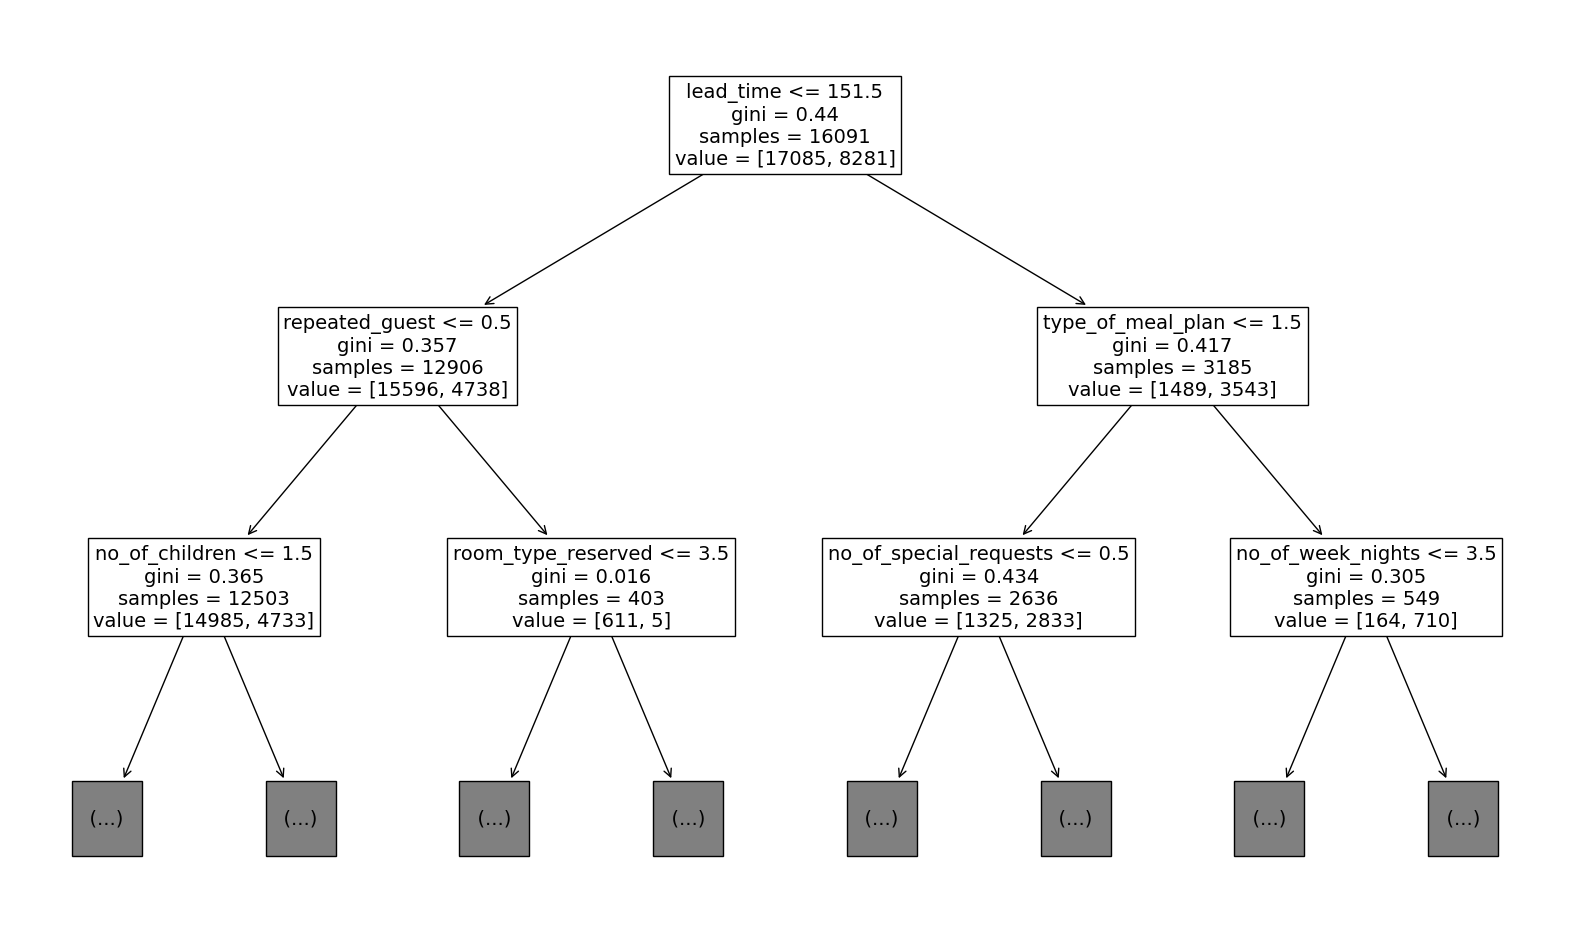

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a tree from the forest (e.g., the first one)
tree_to_plot = rf_model.estimators_[0]

plt.figure(figsize=(20,12))
plot_tree(tree_to_plot, max_depth=2, fontsize=14, feature_names=X.columns);
plt.show()